In [1]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import pandas as pd
data=pd.read_csv('MyDrive/wind turbin/TexasTurbine.csv')
data.head(20)

Time stamp  ...  Air temperature | ('C)
0   Jan 1, 12:00 am  ...                  18.263
1   Jan 1, 01:00 am  ...                  18.363
2   Jan 1, 02:00 am  ...                  18.663
3   Jan 1, 03:00 am  ...                  18.763
4   Jan 1, 04:00 am  ...                  18.963
5   Jan 1, 05:00 am  ...                  19.063
6   Jan 1, 06:00 am  ...                  19.113
7   Jan 1, 07:00 am  ...                  19.163
8   Jan 1, 08:00 am  ...                  19.363
9   Jan 1, 09:00 am  ...                  19.963
10  Jan 1, 10:00 am  ...                  20.763
11  Jan 1, 11:00 am  ...                  21.063
12  Jan 1, 12:00 pm  ...                  21.063
13  Jan 1, 01:00 pm  ...                  20.763
14  Jan 1, 02:00 pm  ...                  20.663
15  Jan 1, 03:00 pm  ...                  20.663
16  Jan 1, 04:00 pm  ...                  20.563
17  Jan 1, 05:00 pm  ...                  20.363
18  Jan 1, 06:00 pm  ...                  20.363
19  Jan 1, 07:00 pm  ...                  20.363

[20 rows x 6 columns]

In [3]:
data=data.drop(['Time stamp'],axis=1)
data

System power generated | (kW)  ...  Air temperature | ('C)
0                           1766.64  ...                  18.263
1                           1433.83  ...                  18.363
2                           1167.23  ...                  18.663
3                           1524.59  ...                  18.763
4                           1384.28  ...                  18.963
...                             ...  ...                     ...
8755                        1234.70  ...                  19.663
8756                        1105.37  ...                  19.063
8757                        1405.71  ...                  18.463
8758                        1221.36  ...                  18.063
8759                        1676.77  ...                  18.163

[8760 rows x 5 columns]

In [4]:
import numpy as np
from sklearn import preprocessing
import pandas as pd


data_array = np.array(data)
y_data = data_array[:,0]
x_data = data_array[:,1:]

for i in range(len(x_data)):
  x_data[i,1] = np.cos((x_data[i,1] * 2 * np.pi) / 360)

scaler = preprocessing.StandardScaler().fit(x_data)
x_data = scaler.transform(x_data)


d = {'System power generated | (kW)': y_data, 'Wind speed | (m/s)': x_data[:,0], 'Wind direction | (deg)': x_data[:,1], 'Pressure | (atm)': x_data[:,2], 'Air temperature | (C)': x_data[:,3]}

data = pd.DataFrame(d)

In [6]:
import numpy as np


data_array = np.array(data)
y_data = data_array[:,0]
x_data = data_array[:,1:]

len_train = int(0.8 * (len(y_data)))

x_train = x_data[0:len_train,:]
y_train = y_data[0:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout


import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.2)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

lstm = Sequential()
lstm.add(LSTM(units = 350, return_sequences = True, input_shape = (x_train.shape[1] , 1)))
lstm.add(LSTM(units = 250, return_sequences = True))
lstm.add(LSTM(units = 150))
lstm.add(Flatten())
lstm.add(Dense(units = 50))
lstm.add(Dense(units = 10))
lstm.add(Dense(units = 1))
lstm.summary()
lstm.compile(optimizer=opt, loss = 'mean_squared_error')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 350)            492800    
                                                                 
 lstm_1 (LSTM)               (None, 4, 250)            601000    
                                                                 
 lstm_2 (LSTM)               (None, 150)               240600    
                                                                 
 flatten (Flatten)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 50)                7550      
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
 dense_2 (Dense)             (None, 1)                

Epoch 1/200
219/219 [==============================] - 11s 15ms/step - loss: 696232.6250
Epoch 2/200
219/219 [==============================] - 3s 15ms/step - loss: 7867.6948
Epoch 3/200
219/219 [==============================] - 3s 15ms/step - loss: 775.6517
Epoch 4/200
219/219 [==============================] - 3s 16ms/step - loss: 550.4893
Epoch 5/200
219/219 [==============================] - 3s 15ms/step - loss: 750.8436
Epoch 6/200
219/219 [==============================] - 3s 15ms/step - loss: 501.6046
Epoch 7/200
219/219 [==============================] - 3s 15ms/step - loss: 607.5775
Epoch 8/200
219/219 [==============================] - 3s 15ms/step - loss: 415.0799
Epoch 9/200
219/219 [==============================] - 3s 15ms/step - loss: 386.7734
Epoch 10/200
219/219 [==============================] - 3s 15ms/step - loss: 359.7899
Epoch 11/200
219/219 [==============================] - 3s 15ms/step - loss: 415.0561
Epoch 12/200
219/219 [==============================] - 3s

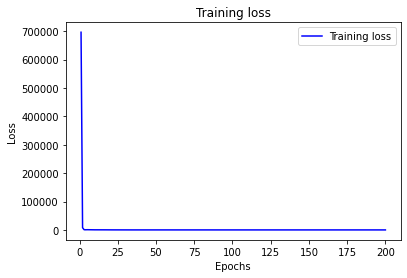

55/55 [==============================] - 2s 6ms/step - loss: 12.6222
MSE test = 12.622237205505371


In [8]:
history_fit = lstm.fit(x_train,y_train, epochs=200, batch_size=32)


# lost by epochs


import matplotlib.pyplot as plt


loss = history_fit.history['loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')

plt.legend()
plt.show()


history_evaluate = lstm.evaluate(x_test,y_test, batch_size=32)
print('MSE test = {}'.format(history_evaluate))

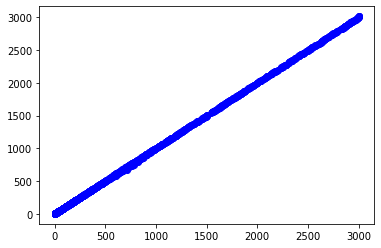

In [10]:
import pandas as pd

y_pred = lstm.predict(x_test, batch_size=32)

plt.plot(y_test,y_pred,'bo')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout


import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.2)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

lstm = Sequential()
lstm.add(LSTM(units = 350, return_sequences = True, input_shape = (x_train.shape[1] , 1)))
lstm.add(LSTM(units = 250, return_sequences = True))
lstm.add(LSTM(units = 150))
lstm.add(Flatten())
lstm.add(Dense(units = 50))
lstm.add(Dense(units = 10))
lstm.add(Dense(units = 1))
lstm.summary()
lstm.compile(optimizer=opt, loss = 'mean_squared_error')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4, 350)            492800    
                                                                 
 lstm_4 (LSTM)               (None, 4, 250)            601000    
                                                                 
 lstm_5 (LSTM)               (None, 150)               240600    
                                                                 
 flatten_1 (Flatten)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                7550      
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
 dense_5 (Dense)             (None, 1)                

Epoch 1/200
219/219 [==============================] - 8s 16ms/step - loss: 860461.6875
Epoch 2/200
219/219 [==============================] - 3s 16ms/step - loss: 19028.7715
Epoch 3/200
219/219 [==============================] - 3s 16ms/step - loss: 769.6105
Epoch 4/200
219/219 [==============================] - 3s 16ms/step - loss: 358.9020
Epoch 5/200
219/219 [==============================] - 3s 16ms/step - loss: 333.6836
Epoch 6/200
219/219 [==============================] - 3s 16ms/step - loss: 271.4924
Epoch 7/200
219/219 [==============================] - 3s 16ms/step - loss: 155.8790
Epoch 8/200
219/219 [==============================] - 3s 16ms/step - loss: 123.5837
Epoch 9/200
219/219 [==============================] - 3s 16ms/step - loss: 93.1010
Epoch 10/200
219/219 [==============================] - 3s 16ms/step - loss: 93.3777
Epoch 11/200
219/219 [==============================] - 3s 16ms/step - loss: 119.1416
Epoch 12/200
219/219 [==============================] - 3s 1

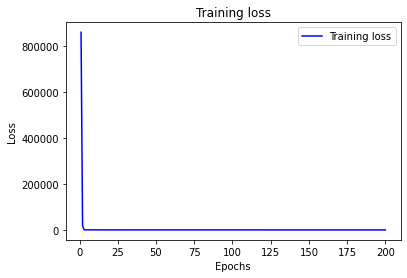

55/55 [==============================] - 2s 5ms/step - loss: 7.9526
MSE test = 7.952584266662598


In [ ]:
history_fit = lstm.fit(x_train,y_train, epochs=200, batch_size=32)


# lost by epochs


import matplotlib.pyplot as plt


loss = history_fit.history['loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')

plt.legend()
plt.show()


history_evaluate = lstm.evaluate(x_test,y_test, batch_size=32)
print('MSE test = {}'.format(history_evaluate))

In [ ]:
y_pred = lstm.predict(x_test)

for i in range(len(y_pred)):
  print('y test = {}  and  y pred = {}'.format(y_test[i],y_pred[i]))

y test = 1732.11  and  y pred = [1732.2006]
y test = 1617.67  and  y pred = [1618.7367]
y test = 1722.05  and  y pred = [1722.4077]
y test = 1661.26  and  y pred = [1661.6384]
y test = 1831.65  and  y pred = [1828.8015]
y test = 1884.06  and  y pred = [1884.3007]
y test = 1662.68  and  y pred = [1663.9078]
y test = 1433.14  and  y pred = [1432.2567]
y test = 1622.88  and  y pred = [1623.8491]
y test = 1151.48  and  y pred = [1151.2977]
y test = 1124.16  and  y pred = [1124.8394]
y test = 764.5989999999999  and  y pred = [763.7003]
y test = 607.335  and  y pred = [614.23065]
y test = 341.601  and  y pred = [343.56702]
y test = 197.959  and  y pred = [202.84966]
y test = 261.046  and  y pred = [260.558]
y test = 372.356  and  y pred = [377.87103]
y test = 400.776  and  y pred = [403.89908]
y test = 667.685  and  y pred = [670.5718]
y test = 1021.22  and  y pred = [1024.1715]
y test = 938.059  and  y pred = [943.6292]
y test = 272.283  and  y pred = [271.70325]
y test = 981.197  and  y pr

In [ ]:
import numpy as np
from sklearn import preprocessing


data_array = np.array(data)
y_data = data_array[:,0]
x_data = data_array[:,1:]

for i in range(len(x_data)):
  x_data[i,1] = np.cos((x_data[i,1] * 2 * np.pi) / 360)

scaler = preprocessing.StandardScaler().fit(x_data)
x_data = scaler.transform(x_data)


len_train = int(0.8 * (len(y_data)))

x_train = x_data[0:len_train,:]
y_train = y_data[0:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout


import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.2)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

lstm = Sequential()
lstm.add(LSTM(units = 200, return_sequences = True, input_shape = (x_train.shape[1] , 1)))
lstm.add(LSTM(units = 150, return_sequences = True,))
lstm.add(LSTM(units = 100))
lstm.add(Flatten())
lstm.add(Dense(units = 50))
lstm.add(Dense(units = 10))
lstm.add(Dense(units = 1))
lstm.summary()
lstm.compile(optimizer=opt, loss = 'mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 200)            161600    
                                                                 
 lstm_1 (LSTM)               (None, 4, 150)            210600    
                                                                 
 lstm_2 (LSTM)               (None, 100)               100400    
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

Epoch 1/100
165/165 [==============================] - 10s 22ms/step - loss: 1398846.5000 - val_loss: 668067.8125
Epoch 2/100
165/165 [==============================] - 2s 13ms/step - loss: 309882.3125 - val_loss: 3715.0996
Epoch 3/100
165/165 [==============================] - 2s 13ms/step - loss: 3820.2534 - val_loss: 1426.6785
Epoch 4/100
165/165 [==============================] - 2s 13ms/step - loss: 1044.9290 - val_loss: 898.5076
Epoch 5/100
165/165 [==============================] - 2s 13ms/step - loss: 817.4557 - val_loss: 2082.7380
Epoch 6/100
165/165 [==============================] - 2s 15ms/step - loss: 1581.1562 - val_loss: 2167.5613
Epoch 7/100
165/165 [==============================] - 2s 14ms/step - loss: 719.8537 - val_loss: 528.6196
Epoch 8/100
165/165 [==============================] - 2s 13ms/step - loss: 355.1103 - val_loss: 200.5967
Epoch 9/100
165/165 [==============================] - 2s 13ms/step - loss: 219.2317 - val_loss: 113.5883
Epoch 10/100
165/165 [======

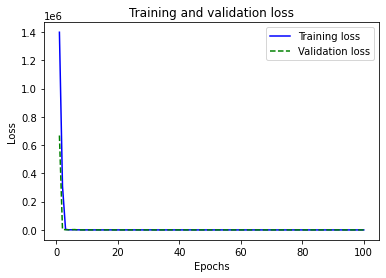

55/55 [==============================] - 0s 5ms/step - loss: 31.2339
MSE test = 31.233928680419922


In [ ]:
history_fit = lstm.fit(x_train,y_train, epochs=100, validation_data = (x_validation,y_validation), batch_size=32)


# lost by epochs


import matplotlib.pyplot as plt


loss = history_fit.history['loss']
val_loss = history_fit.history['val_loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g--', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()


history_evaluate = lstm.evaluate(x_test,y_test, batch_size=32)
print('MSE test = {}'.format(history_evaluate))

In [ ]:
import numpy as np


data_array = np.array(data)
y_data = data_array[:,0]
x_data = data_array[:,1:]

len_train = int(0.8 * (len(y_data)))

x_train = x_data[0:len_train,:]
y_train = y_data[0:len_train]

x_test = x_data[len_train:]
y_test = y_data[len_train:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout


import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.2)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

lstm = Sequential()
lstm.add(LSTM(units = 200, return_sequences = True, input_shape = (x_train.shape[1] , 1)))
lstm.add(LSTM(units = 150, return_sequences = True,))
lstm.add(LSTM(units = 100))
lstm.add(Flatten())
lstm.add(Dense(units = 50))
lstm.add(Dense(units = 10))
lstm.add(Dense(units = 1))
lstm.summary()
lstm.compile(optimizer=opt, loss = 'mean_squared_error')

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_62 (LSTM)              (None, 4, 200)            161600    
                                                                 
 lstm_63 (LSTM)              (None, 4, 150)            210600    
                                                                 
 lstm_64 (LSTM)              (None, 100)               100400    
                                                                 
 flatten_25 (Flatten)        (None, 100)               0         
                                                                 
 dense_67 (Dense)            (None, 50)                5050      
                                                                 
 dense_68 (Dense)            (None, 10)                510       
                                                                 
 dense_69 (Dense)            (None, 1)               

Epoch 1/100
219/219 [==============================] - 7s 10ms/step - loss: 1047252.5000
Epoch 2/100
219/219 [==============================] - 2s 10ms/step - loss: 36864.3359
Epoch 3/100
219/219 [==============================] - 2s 10ms/step - loss: 1040.7798
Epoch 4/100
219/219 [==============================] - 2s 10ms/step - loss: 529.8286
Epoch 5/100
219/219 [==============================] - 2s 10ms/step - loss: 577.5236
Epoch 6/100
219/219 [==============================] - 2s 10ms/step - loss: 422.7037
Epoch 7/100
219/219 [==============================] - 2s 10ms/step - loss: 190.4691
Epoch 8/100
219/219 [==============================] - 2s 11ms/step - loss: 167.0968
Epoch 9/100
219/219 [==============================] - 2s 10ms/step - loss: 216.7648
Epoch 10/100
219/219 [==============================] - 2s 10ms/step - loss: 110.4009
Epoch 11/100
219/219 [==============================] - 2s 10ms/step - loss: 204.2846
Epoch 12/100
219/219 [==============================] - 

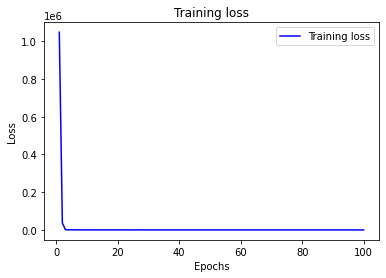

55/55 [==============================] - 2s 5ms/step - loss: 27.5100
MSE test = 27.509981155395508


In [ ]:
history_fit = lstm.fit(x_train,y_train, epochs=100, batch_size=32)


# lost by epochs


import matplotlib.pyplot as plt


loss = history_fit.history['loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')

plt.legend()
plt.show()


history_evaluate = lstm.evaluate(x_test,y_test, batch_size=32)
print('MSE test = {}'.format(history_evaluate))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout


import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=7e-4,
    decay_steps=10000,
    decay_rate=0.2)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

lstm = Sequential()
lstm.add(LSTM(units = 300, return_sequences = True, input_shape = (x_train.shape[1] , 1)))
lstm.add(LSTM(units = 250, return_sequences = True))
lstm.add(LSTM(units = 200))
lstm.add(Flatten())
lstm.add(Dense(units = 150))
lstm.add(Dense(units = 100))
lstm.add(Dense(units = 50))
lstm.add(Dense(units = 5))
lstm.add(Dense(units = 1))
lstm.summary()
lstm.compile(optimizer=opt, loss = 'mean_squared_error')

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_86 (LSTM)              (None, 4, 300)            362400    
                                                                 
 lstm_87 (LSTM)              (None, 4, 250)            551000    
                                                                 
 lstm_88 (LSTM)              (None, 200)               360800    
                                                                 
 flatten_33 (Flatten)        (None, 200)               0         
                                                                 
 dense_101 (Dense)           (None, 150)               30150     
                                                                 
 dense_102 (Dense)           (None, 100)               15100     
                                                                 
 dense_103 (Dense)           (None, 50)              

Epoch 1/200
219/219 [==============================] - 8s 15ms/step - loss: 634416.8125
Epoch 2/200
219/219 [==============================] - 3s 15ms/step - loss: 1893.7974
Epoch 3/200
219/219 [==============================] - 3s 15ms/step - loss: 502.3608
Epoch 4/200
219/219 [==============================] - 3s 15ms/step - loss: 324.3030
Epoch 5/200
219/219 [==============================] - 3s 15ms/step - loss: 189.3540
Epoch 6/200
219/219 [==============================] - 3s 15ms/step - loss: 218.8604
Epoch 7/200
219/219 [==============================] - 3s 15ms/step - loss: 220.7660
Epoch 8/200
219/219 [==============================] - 3s 15ms/step - loss: 288.0462
Epoch 9/200
219/219 [==============================] - 3s 15ms/step - loss: 291.2999
Epoch 10/200
219/219 [==============================] - 3s 15ms/step - loss: 85.5374
Epoch 11/200
219/219 [==============================] - 3s 15ms/step - loss: 368.8767
Epoch 12/200
219/219 [==============================] - 3s 1

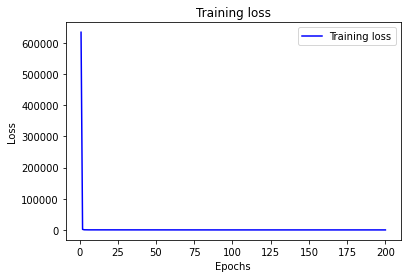

55/55 [==============================] - 2s 6ms/step - loss: 25.8750
MSE test = 25.874975204467773


In [ ]:
history_fit = lstm.fit(x_train,y_train, epochs=200, batch_size=32)


# lost by epochs


import matplotlib.pyplot as plt


loss = history_fit.history['loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')

plt.legend()
plt.show()


history_evaluate = lstm.evaluate(x_test,y_test, batch_size=32)
print('MSE test = {}'.format(history_evaluate))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout


import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.2)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

lstm = Sequential()
lstm.add(LSTM(units = 300, return_sequences = True, input_shape = (x_train.shape[1] , 1)))
lstm.add(LSTM(units = 150, return_sequences = True,))
lstm.add(LSTM(units = 100))
lstm.add(Flatten())
lstm.add(Dense(units = 50))
lstm.add(Dense(units = 10))
lstm.add(Dense(units = 1))
lstm.summary()
lstm.compile(optimizer=opt, loss = 'mean_squared_error')

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_68 (LSTM)              (None, 4, 300)            362400    
                                                                 
 lstm_69 (LSTM)              (None, 4, 150)            270600    
                                                                 
 lstm_70 (LSTM)              (None, 100)               100400    
                                                                 
 flatten_27 (Flatten)        (None, 100)               0         
                                                                 
 dense_73 (Dense)            (None, 50)                5050      
                                                                 
 dense_74 (Dense)            (None, 10)                510       
                                                                 
 dense_75 (Dense)            (None, 1)               

Epoch 1/200
219/219 [==============================] - 7s 12ms/step - loss: 1027654.4375
Epoch 2/200
219/219 [==============================] - 3s 12ms/step - loss: 29910.5215
Epoch 3/200
219/219 [==============================] - 3s 12ms/step - loss: 915.8109
Epoch 4/200
219/219 [==============================] - 3s 12ms/step - loss: 527.2921
Epoch 5/200
219/219 [==============================] - 3s 12ms/step - loss: 703.1461
Epoch 6/200
219/219 [==============================] - 3s 12ms/step - loss: 1156.1842
Epoch 7/200
219/219 [==============================] - 3s 12ms/step - loss: 262.2704
Epoch 8/200
219/219 [==============================] - 3s 12ms/step - loss: 404.6149
Epoch 9/200
219/219 [==============================] - 3s 12ms/step - loss: 149.3397
Epoch 10/200
219/219 [==============================] - 3s 12ms/step - loss: 129.0431
Epoch 11/200
219/219 [==============================] - 3s 12ms/step - loss: 143.0586
Epoch 12/200
219/219 [==============================] - 

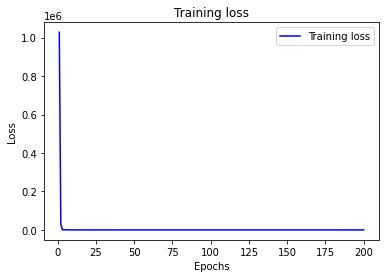

55/55 [==============================] - 2s 5ms/step - loss: 23.0273
MSE test = 23.027254104614258


In [ ]:
history_fit = lstm.fit(x_train,y_train, epochs=200, batch_size=32)


# lost by epochs


import matplotlib.pyplot as plt


loss = history_fit.history['loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')

plt.legend()
plt.show()


history_evaluate = lstm.evaluate(x_test,y_test, batch_size=32)
print('MSE test = {}'.format(history_evaluate))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout


import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.2)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

lstm = Sequential()
lstm.add(LSTM(units = 300, return_sequences = True, input_shape = (x_train.shape[1] , 1)))
lstm.add(LSTM(units = 250, return_sequences = True,))
lstm.add(LSTM(units = 200))
lstm.add(Flatten())
lstm.add(Dense(units = 150))
lstm.add(Dense(units = 100))
lstm.add(Dense(units = 50))
lstm.add(Dense(units = 1))
lstm.summary()
lstm.compile(optimizer=opt, loss = 'mean_squared_error')

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_89 (LSTM)              (None, 4, 300)            362400    
                                                                 
 lstm_90 (LSTM)              (None, 4, 250)            551000    
                                                                 
 lstm_91 (LSTM)              (None, 200)               360800    
                                                                 
 flatten_34 (Flatten)        (None, 200)               0         
                                                                 
 dense_106 (Dense)           (None, 150)               30150     
                                                                 
 dense_107 (Dense)           (None, 100)               15100     
                                                                 
 dense_108 (Dense)           (None, 50)              

Epoch 1/200
219/219 [==============================] - 8s 15ms/step - loss: 561079.5000
Epoch 2/200
219/219 [==============================] - 3s 15ms/step - loss: 930.3876
Epoch 3/200
219/219 [==============================] - 3s 15ms/step - loss: 397.6017
Epoch 4/200
219/219 [==============================] - 3s 15ms/step - loss: 188.3374
Epoch 5/200
219/219 [==============================] - 3s 15ms/step - loss: 221.3650
Epoch 6/200
219/219 [==============================] - 3s 15ms/step - loss: 230.4239
Epoch 7/200
219/219 [==============================] - 3s 15ms/step - loss: 174.9634
Epoch 8/200
219/219 [==============================] - 3s 15ms/step - loss: 556.7263
Epoch 9/200
219/219 [==============================] - 3s 15ms/step - loss: 136.1876
Epoch 10/200
219/219 [==============================] - 3s 15ms/step - loss: 624.0173
Epoch 11/200
219/219 [==============================] - 3s 15ms/step - loss: 98.4161
Epoch 12/200
219/219 [==============================] - 3s 15

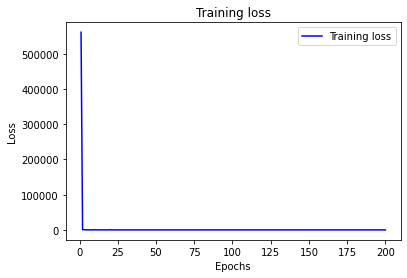

55/55 [==============================] - 2s 6ms/step - loss: 23.7527
MSE test = 23.75271987915039


In [ ]:
history_fit = lstm.fit(x_train,y_train, epochs=200, batch_size=32)


# lost by epochs


import matplotlib.pyplot as plt


loss = history_fit.history['loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')

plt.legend()
plt.show()


history_evaluate = lstm.evaluate(x_test,y_test, batch_size=32)
print('MSE test = {}'.format(history_evaluate))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout


import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.2)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

lstm = Sequential()
lstm.add(LSTM(units = 350, return_sequences = True, input_shape = (x_train.shape[1] , 1)))
lstm.add(LSTM(units = 250, return_sequences = True,))
lstm.add(LSTM(units = 150))
lstm.add(Flatten())
lstm.add(Dense(units = 50))
lstm.add(Dense(units = 10))
lstm.add(Dense(units = 1))
lstm.summary()
lstm.compile(optimizer=opt, loss = 'mean_squared_error')

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_92 (LSTM)              (None, 4, 350)            492800    
                                                                 
 lstm_93 (LSTM)              (None, 4, 250)            601000    
                                                                 
 lstm_94 (LSTM)              (None, 150)               240600    
                                                                 
 flatten_35 (Flatten)        (None, 150)               0         
                                                                 
 dense_110 (Dense)           (None, 50)                7550      
                                                                 
 dense_111 (Dense)           (None, 10)                510       
                                                                 
 dense_112 (Dense)           (None, 1)               

Epoch 1/200
219/219 [==============================] - 8s 15ms/step - loss: 909243.1875
Epoch 2/200
219/219 [==============================] - 3s 15ms/step - loss: 11958.6396
Epoch 3/200
219/219 [==============================] - 3s 15ms/step - loss: 683.7710
Epoch 4/200
219/219 [==============================] - 3s 15ms/step - loss: 1642.2487
Epoch 5/200
219/219 [==============================] - 3s 15ms/step - loss: 2074.3860
Epoch 6/200
219/219 [==============================] - 3s 15ms/step - loss: 844.6266
Epoch 7/200
219/219 [==============================] - 3s 15ms/step - loss: 553.0064
Epoch 8/200
219/219 [==============================] - 3s 15ms/step - loss: 617.9782
Epoch 9/200
219/219 [==============================] - 3s 15ms/step - loss: 685.6126
Epoch 10/200
219/219 [==============================] - 3s 15ms/step - loss: 468.8252
Epoch 11/200
219/219 [==============================] - 3s 15ms/step - loss: 323.3817
Epoch 12/200
219/219 [==============================] - 

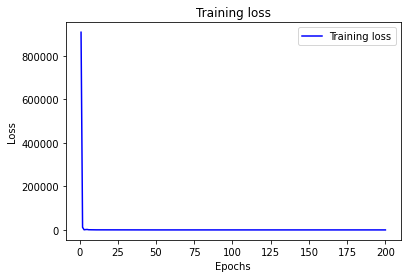

55/55 [==============================] - 2s 6ms/step - loss: 23.0983
MSE test = 23.0982666015625


In [ ]:
history_fit = lstm.fit(x_train,y_train, epochs=200, batch_size=32)


# lost by epochs


import matplotlib.pyplot as plt


loss = history_fit.history['loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b', label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')

plt.legend()
plt.show()


history_evaluate = lstm.evaluate(x_test,y_test, batch_size=32)
print('MSE test = {}'.format(history_evaluate))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout


import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.2)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

lstm = Sequential()
lstm.add(LSTM(units = 350, return_sequences = True, input_shape = (x_train.shape[1] , 1)))
lstm.add(LSTM(units = 250, return_sequences = True,))
lstm.add(LSTM(units = 200, return_sequences = True,))
lstm.add(LSTM(units = 150, return_sequences = True,))
lstm.add(LSTM(units = 150))
lstm.add(Flatten())
lstm.add(Dense(units = 50))
lstm.add(Dense(units = 10))
lstm.add(Dense(units = 1))
lstm.summary()
lstm.compile(optimizer=opt, loss = 'mean_squared_error')

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_95 (LSTM)              (None, 4, 350)            492800    
                                                                 
 lstm_96 (LSTM)              (None, 4, 250)            601000    
                                                                 
 lstm_97 (LSTM)              (None, 4, 200)            360800    
                                                                 
 lstm_98 (LSTM)              (None, 4, 150)            210600    
                                                                 
 lstm_99 (LSTM)              (None, 150)               180600    
                                                                 
 flatten_36 (Flatten)        (None, 150)               0         
                                                                 
 dense_113 (Dense)           (None, 50)              